<a href="https://colab.research.google.com/github/namyh/hw3/blob/main/MC_NVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def threedplot(crd) :
  crd_x = np.array([crd[i][0] for i in range(len(crd))])
  crd_y = np.array([crd[i][1] for i in range(len(crd))])
  crd_z = np.array([crd[i][2] for i in range(len(crd))])

  plt.rcParams["figure.figsize"] = (6, 6)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(crd_x, crd_y, crd_z, marker='o', s=15, cmap='Greens')
  plt.show()



In [2]:
import numpy as np
import math as mt
import random as rd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

##### initialization #####
#npart = input('number of particles = ')

class MC : 
  def __init__(self, npart, density, temp, maxdr, nstep, printfreq):
    self.npart = npart
    self.dens = density  
    self.temp = temp
    self.maxdr = maxdr 
    self.nstep = nstep
    self.print = printfreq
    self.V = self.npart/self.dens
    self.beta = 1.0/self.temp

  #  self.coords = np.zeros(3,self.npart)
  


  def config(self):
    coords = np.zeros((self.npart, 3))
    L = (self.npart/self.dens)**(1.0/3)
   # self.coords = coords
    self.L = L
    print(self.L, 'L')
    for part in range(0, self.npart):
      index = [(rd.randint(0, 1000)/1000.0)-0.5, (rd.randint(0, 1000)/1000.0)-0.5 , (rd.randint(0, 1000)/1000.0)-0.5]
      coords[part,:] = np.dot(index,self.L) ### all same initial coord
    self.coords = coords
    return coords
  #  print(coords)



  def pbc3d(self, vec, L) : 
    for dim in range (0,3):
      if vec[dim] > L/2 : 
        vec[dim] = vec[dim] - L 
      elif vec[dim] < -L/2 : 
        vec[dim] = vec[dim] + L
    return vec

  def distpbc3d(self, vector, a) : 
    ha = a / 2.0
    for dim in range (0,3):
      if vector[dim] > ha: 
        vector[dim] = vector[dim] - a
      elif vector[dim] < -ha:
        vector[dim] = vector[dim] + a
    return vector

  def distpbc3dold(self, old, a) : 
    ha = a / 2.0
    for dim in range (0,3):
      if old[dim] > ha: 
        old[dim] = old[dim] - a
      elif old[dim] < -ha:
        old[dim] = old[dim] + a
    return old
  
  def LJ_E(self, mat,L) : 
    self.energy = 0
    virial = 0
    for partA in range (0,self.npart-1):
      for partB in range (partA + 1, self.npart):
        dr = mat[partA,:] - mat[partB,:]
        dr = self.distpbc3d(dr, L)
        dr2 = dr[0]**2 + dr[1]**2 + dr[2]**2
        invdr6 = 1.0 /(dr2**3) ###/r^6
        virial += (invdr6 * ( invdr6 -1)) + invdr6**2
        self.energy += (invdr6 * ( invdr6 -1))
    energy = self.energy * 4
    virial = virial*24.0/3.0
    pressure = (self.dens/self.beta) + (virial/L**3)
    return energy, virial, pressure



        
  def LJ_E_change(self, coords, trialpos, i, L) : 
    deltaE = 0 
    self.i = i
    
    for otherpart in range (0, self.npart):
      if otherpart == self.i :
        continue
      drnew = coords[otherpart,:] - trialpos
      drold = coords[otherpart,:] - coords[self.i,:]

      # pbc
      drnew_pbc = self.distpbc3d(drnew, L)
      drold_pbc = self.distpbc3dold(drold, L)

      # get the dist sqared
      drnew2 = (drnew_pbc[0]**2 + drnew_pbc[1]**2 + drnew_pbc[2]**2)
      drold2 = (drold_pbc[0]**2 + drold_pbc[1]**2 + drold_pbc[2]**2)  


  #    print(drold2,'drold2')
      invdrnew6 = 1.0 / (drnew2**3)
      invdrold6 = 1.0 / (drold2**3)
      
      enew = (invdrnew6 * (invdrnew6 - 1))
      eold = (invdrold6 * (invdrold6 - 1))
      
      deltaE = deltaE + enew - eold
    deltaE = deltaE * 4
    return deltaE
   

  def sim(self): 
    self.config()
    threedplot(self.coords)
    E, vir, P = self.LJ_E(self.coords, self.L)
    print(E)
    rand = np.random.rand(1,3)
    for step in range (0, self.nstep): 
      if step % self.print ==0: 
        step
      for i in range (0, self.npart):
        rand = np.array([(rd.randint(0, 1000)/1000.0), (rd.randint(0, 1000)/1000.0) , (rd.randint(0, 1000)/1000.0)])
        rtrial = self.coords[i,:] + np.array(np.dot(self.maxdr,(rand-0.5)))
        rtrial_pbc = self.pbc3d(rtrial, self.L)
        deltaE = self.LJ_E_change(self.coords, rtrial_pbc, i, self.L)
      
        if np.all(rand < np.exp(-self.beta*deltaE)):
          self.coords[i,:] = rtrial_pbc
          E += deltaE


    coordinates = self.coords
    threedplot(coordinates)
    finalE, finalvir, finalP = self.LJ_E(coordinates, self.L)
    return coordinates, E, self.dens, finalE, finalvir, finalP
        ####변화 plot

 





In [3]:
#  def __init__(self, npart, density, temp, maxdr, nstep, printfreq):
test = MC(108, 0.8442, 1.5043, 0.1, 2000, 100)
#coordinates, E = test.sim()


5.038788574147522 L


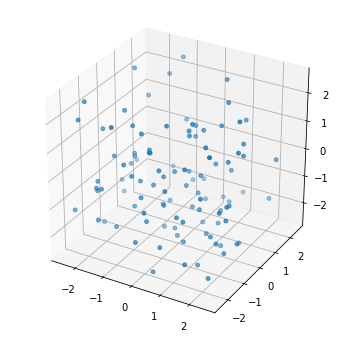

22261299716810.418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: overflow encountered in exp


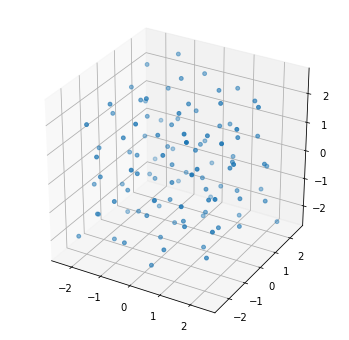

In [4]:
coordinates, E, density, finalE, finalvir, finalP = test.sim()


In [29]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

class GR :
  def __init__(self, npart, density, temp, maxdr, nstep, coords):
    self.npart = npart
    self.dens = density  
    self.temp = temp
    self.maxdr = maxdr 
    self.nstep = nstep
    self.V = self.npart/self.dens
    self.beta = 1.0/self.temp
    self.coords = coords
    L = (self.npart/self.dens)**(1.0/3)
    self.L = L
    print(L)

   
  def switch0(self, count, range, increment, outfreq, savefilename):
    self.count = count 
    self.range = range
    self.increment = increment
    self.outfreq = outfreq
    self.savefilename = savefilename 


  def histogram(self, data):
    self.data = data
    if self.count == 0:
      nbins = np.floor((self.range[1]-self.range[0]) / self.increment)
      print(self.range[1])
      print(nbins)
      self.nbins = int(nbins)
      self.range[1] = self.range[0] + nbins * self.increment
      self.histo = np.zeros(self.nbins)
      self.values = np.arange(0, self.nbins, 1)
      self.values = self.range[0] + self.increment * (self.values - 0.5)

    if self.data > self.range[0] and data <= self.range[1]:
      binindex = np.ceil((data-self.range[0]) / self.increment) 
      self.histo[int(binindex-1)] = self.histo[int(binindex-1)] + 1
      self.count = self.count + 1 

    else : 
      print('data = ', data)
      return 


  def grdistPBC3D(self, vec, L) : 
    hL = L/2.0 
    for dim in range (0,3):
      if (vec[dim] > hL): 
        vec[dim] = vec[dim] - L 
      elif vec[dim] < -hL :
        vec[dim] = vec[dim] + L 
    return vec


  def gr(self, switch) : 
   if switch == 0 :  ### initialization 
     self.switch0(0, np.array([0, 0.5*self.L]), self.L/300.0, 1000, '/content/drive/MyDrive/Colab Notebooks/gr.dat')
  
   elif switch == 1: 

      for partA in range (0, self.npart-1) : 
        for partB in range (partA +1 , self.npart):
          dr = self.coords[partA, :] - self.coords[partB, :]
          dr = self.grdistPBC3D(dr, self.L)
          r = mt.sqrt(dr[0]**2 + dr[1]**2 + dr[2]**2)

          if (r < 0.5 * self.L) : 
            g_r = self.histogram(r)
  
   elif switch == 2: 
      self.histo = self.histo/ (self.count * self.increment)
      
      for bin in range(0, self.nbins) : 
        rval = self.values[bin]
        next_rval = rval + self.increment
        volbin = (4/3.0)  * mt.pi * (next_rval ** 3 - rval ** 3)
        nideal = volbin * self.dens
        self.histo[bin] = self.histo[bin] / nideal 
      f = []
      ind = []
      for i in range(0, np.size(self.histo)):
        f.append(self.histo[i])
        print(self.histo[i])
        ind.append(i*self.increment)
      plt.plot(ind, f)
      plt.axhline(y=1.0, color='r',linewidth=1)
     
      plt.show()
   else :
     print('radial distribution : you have entered an illegal switch value')


In [30]:
#test = MC(108, 0.8442, 1.5043, 0.1, 2000, 100)
result = GR(108, 0.8442, 1.5043, 0.1, 2000, coordinates)
result.gr(0)
result.gr(1)


5.038788574147522
2.519394287073761
150.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.23921006335885214
0.5775818796786082
0.3349015330583739
0.9714942992371101
1.9842413952664522
2.4262120124775994
3.230978167606303
4.174401268011341
3.3111398371899625
3.3899845435629556
2.5970115911651104
2.941390551374495
2.8567521450863635
2.0619597470090145
2.775165736289622
2.0239607719787553
2.0418123230101335
1.9870019059269144
1.7961999834650848
1.0091787789049254
0.9175944584194774
1.0858355800317092
0.8094567922494545
0.6071900860860023
0.8884357093243841
0.6357258905382426
0.5640905998801392
0.6608879685589202
0.8605724188000802
0.8406756873839312
0.6674371350773268
0.8028977959774218
0.39247835040654144
0.5277320848719698
0.4692703833183188
0.7345990339807006
0.5840951116393697
0.5277542553902032
0.6028192548738008
0.21083072979976752
0.78472337034

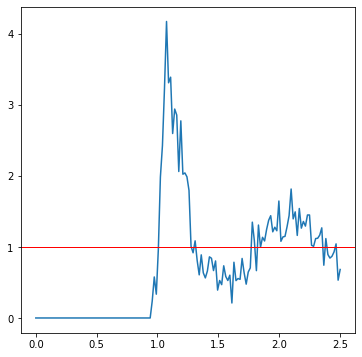

In [31]:
result.gr(2)

In [9]:
#reset
listrho = []
listp = []

In [17]:
listrho.append(density)
listp.append(finalP)

In [18]:
print(listrho, listp)

[0.9, 0.8] [-0.6715633726118814, -1.8257628350515411]
